In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [6]:
# Load the data
data = pd.read_csv('agricultural_yield.csv')

In [7]:
# Separate features and target
X = data.drop(columns=['Yield_kg_per_hectare'])
y = data['Yield_kg_per_hectare']

In [8]:
# One-hot encode categorical columns if needed
X = pd.get_dummies(X, columns=['Soil_Quality', 'Seed_Variety', 'Irrigation_Schedule'], drop_first=True)

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=16, validation_split=0.2, verbose=1)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Mean Absolute Error on Test Data: {mae}")

Epoch 1/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 473511.6562 - mae: 657.8458 - val_loss: 416026.0625 - val_mae: 621.7250
Epoch 2/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 3187379.2500 - mae: 1213.4625 - val_loss: 496784.0938 - val_mae: 679.2726
Epoch 3/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 200077.6719 - mae: 362.3601 - val_loss: 494992.6875 - val_mae: 678.3367
Epoch 4/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 164169.5000 - mae: 330.7794 - val_loss: 496362.0000 - val_mae: 679.3750
Epoch 5/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 126804.7422 - mae: 280.7685 - val_loss: 494423.0000 - val_mae: 677.9099
Epoch 6/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 96706.1562 - mae: 239.8356 - val_loss: 493903.9062 - val_mae: 677.1964
Epoch 7/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 68735.6172 - mae: 200.3913 - val_loss: 495438.5938 - val_mae: 677.9664
Epoch 8/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 52062.1641 -

In [14]:
# Make predictions
predictions = model.predict(X_test)

# Save the model
model.save('yield_prediction_model.h5')

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [15]:
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f"The Mean Absolute Error: (test_mae:.2f)")

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2711613.7500 - mae: 1641.4990
The Mean Absolute Error: (test_mae:.2f)


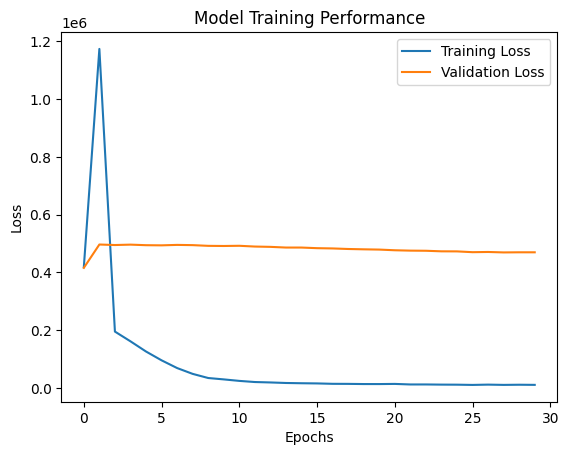

In [18]:
import matplotlib.pyplot as plt # Import the pyplot module from matplotlib

plt.plot(history.history['loss'], label='Training Loss') # Corrected: label instead of labels
plt.plot(history.history['val_loss'], label='Validation Loss') # Corrected: label instead of labels
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Training Performance')
plt.legend()
plt.show()

<ipython-input-20-675a942586a5>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, label='Actual Yield')
<ipython-input-20-675a942586a5>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(predictions, label='Predicted Yield')  # Using 'predictions' instead of potentially undefined 'y_pred'


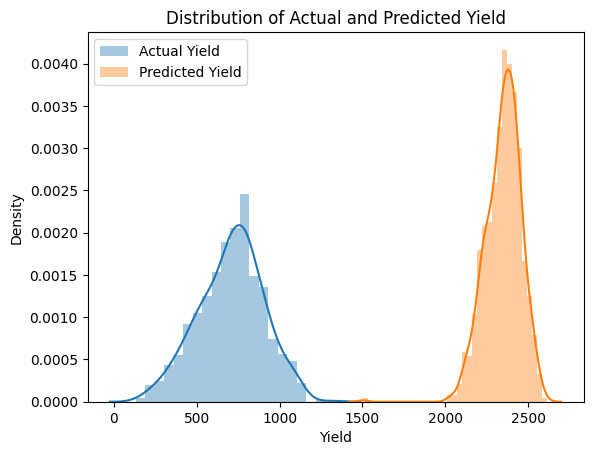

In [20]:
!pip install seaborn
import seaborn as sns # Importing seaborn library with alias 'sns'
import matplotlib.pyplot as plt # Import the pyplot module from matplotlib


# Distribution plots
sns.distplot(y_test, label='Actual Yield')
sns.distplot(predictions, label='Predicted Yield')  # Using 'predictions' instead of potentially undefined 'y_pred'
plt.xlabel("Yield")
plt.ylabel("Density")
plt.title("Distribution of Actual and Predicted Yield")
plt.legend()
plt.show()

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

NameError: name 'y_pred' is not defined

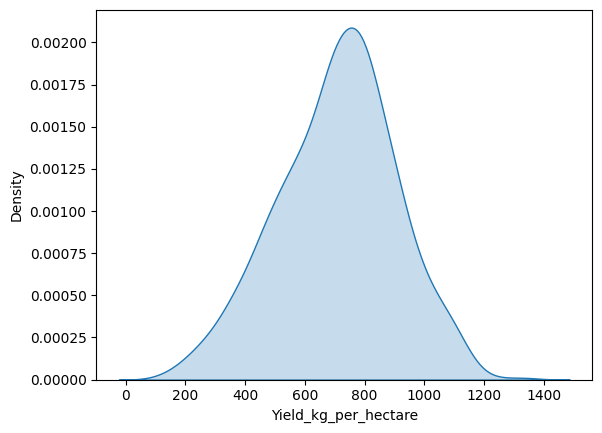

In [22]:
sns.kdeplot(y_test, label='Actual Yield', fill=True)
sns.kdeplot(y_pred, label='Predicted Yield', fill=True)
plt.xlabel("Yield")
plt.ylabel("Density")
plt.title("Distribution of Actual and Predicted Yield")
plt.legend()
plt.show()

NameError: name 'y_pred' is not defined

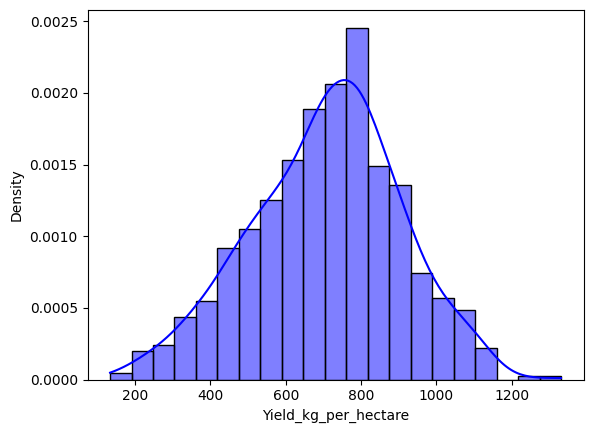

In [23]:
sns.histplot(y_test, label='Actual Yield', kde=True, color='blue', stat="density")
sns.histplot(y_pred, label='Predicted Yield', kde=True, color='orange', stat="density")
plt.xlabel("Yield")
plt.ylabel("Density")
plt.title("Distribution of Actual and Predicted Yield")
plt.legend()
plt.show()